<a href="https://colab.research.google.com/github/jimtoberfest/EDAs/blob/main/Kickstarter_mod5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Portfolio Module 5
___
# Kickstarter Dataset Analysis

## Background
### Kickstarter is a crowdfunding company that only generates revenue when a project has acheived its target goal fundraising amount.  Therefore, the ability to properly identify and magnify the exposure of successful campaigns is critical to the success of the company. 

## Dataset
### This dataset spans from 2009 to 2019.  
### Dataset available from the following link:   [Kickstarter Dataset 2.0](https://www.kaggle.com/yashkantharia/kickstarter-campaigns-dataset-20).


#### Note:  Use the toggle below the following codeblock to turn code cells on and off for readability

___

In [ ]:
# C:\Users\jimgi\Py_MIS480\Kickstarter_Campaigns_DataSet.csv

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [ ]:
# import packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime
from datetime import datetime
from scipy import stats

In [ ]:
# settings for the notebook to make display and reading a little easier

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.max_colwidth = 100  # makes individual cells larger to read long print entries

pd.options.display.float_format = '{:,}'.format  #add commas to large numbers for readability

import warnings
warnings.simplefilter('ignore') #Stops deprecated code warnings from popping up

#Seaborn formatting

sns.set_theme(style="whitegrid")

In [ ]:
# Reading dataset from Drive or if in Colab selecting the file from your computer

# ks_path = r'C:\Users\jimgi\Py_MIS480\Kickstarter_Campaigns_DataSet.csv'

from google.colab import files
files.upload()

df1 = pd.read_csv(ks_path)

### Generate some basic statistics and metadata about our dataset

In [ ]:
# basic info

print('Numeric Data: ')
df1.describe().T

Numeric Data: 


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,"207,839.0","103,923.44139935238","60,000.93843738334",0.0,"51,961.5","103,923.0","155,885.5","207,847.0"
id,"207,839.0","1,073,131,711.6691862","619,529,030.6448271","8,624.0","534,997,551.0","1,075,616,930.0","1,608,411,170.0","2,147,476,221.0"
backers_count,"207,839.0",148.1850567025438,890.4241185124322,0.0,4.0,27.0,89.0,"105,857.0"
usd_pledged,"207,839.0","13,190.163647742374","89,313.1197797129",0.0,105.0,"1,547.0","6,646.0","8,596,474.58"
creator_id,"207,839.0","1,073,981,743.8531075","620,294,882.9147277",3.0,"536,674,048.5","1,072,811,192.0","1,611,959,439.0","2,147,483,434.0"
blurb_length,"207,839.0",112.36637493444445,26.688985372300728,1.0,101.0,124.0,132.0,196.0
goal_usd,"207,839.0","40,393.119838094935","1,096,046.2103080165",0.01,"1,500.0","5,000.0","12,856.7921","128,567,921.0"
duration,"207,839.0",32.676735357656646,11.812612014633515,1.0,30.0,30.0,35.0,93.0


In [ ]:
#checking for missing values and datatypes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207839 entries, 0 to 207838
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     207839 non-null  int64  
 1   id             207839 non-null  int64  
 2   name           207839 non-null  object 
 3   currency       207839 non-null  object 
 4   launched_at    207839 non-null  object 
 5   backers_count  207839 non-null  int64  
 6   blurb          207839 non-null  object 
 7   country        207839 non-null  object 
 8   deadline       207839 non-null  object 
 9   status         207839 non-null  object 
 10  usd_pledged    207839 non-null  float64
 11  sub_category   207839 non-null  object 
 12  main_category  207839 non-null  object 
 13  creator_id     207839 non-null  int64  
 14  blurb_length   207839 non-null  int64  
 15  goal_usd       207839 non-null  float64
 16  city           207839 non-null  object 
 17  duration       207839 non-nul


### Can see date based data such as launched_at and deadline are not in as datetime format and in as objects.
### We can see however, that 207,839 non-null rows matches the total count above so there does not appear to be missing data.

### Looking at a couple rows of data to get a feel for the dataset:


In [ ]:

df1.head(2)

,Unnamed: 0,id,name,currency,launched_at,backers_count,blurb,country,deadline,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,0,1504859185,Industrial Bamboo Table,USD,11/5/2016 18:42,1,An eco-friendly coffee table that is both functional and beautiful. This table will be long last...,US,12/5/2016 19:42,failed,240.0,crafts,Woodworking,983022919,127,"5,000.0",Austin,30
1,1,49266114,"Custom Pet Portraits on Canvas- ""From Pixels to Paint""",CAD,7/21/2015 12:00,3,We take digital uploads and make them handpainted masterpieces. Help us offer unique keepsakes t...,CA,8/24/2015 12:00,failed,247.9501752,art,Painting,101531536,123,753.7465,London,34


### Need to convert 'launched_at' and 'deadline' to datetime objects for analysis

In [ ]:
# Converting launched at and deadline to datetime objects to make time series analysis easier if necessary

df1['launched_at'] =  pd.to_datetime(df1['launched_at'])
df1['deadline'] =  pd.to_datetime(df1['deadline'])
df1['is_project'] = 1
df1['is_succ'] = df1['status'].apply(lambda x: 1 if x == 'successful' else 0) 


# Make sure changes have taken place

print('launched_at converted to: ', df1['launched_at'].dtypes)
print('deadline converted to: ', df1['deadline'].dtypes)

launched_at converted to:  datetime64[ns]
deadline converted to:  datetime64[ns]


### Adding in some date and day encoder columns for future potential of time series analysis or machine learning techniques

In [ ]:
# Add in some numeric values based on datetimes to simplify later time analysis and quarterly analysis

def date_quarter_encoder(df,column, prefix):
    df[prefix + '_month']             = df[column].dt.month
#     df[prefix + '_week"]            = df[column].dt.week, deprecated
    df[prefix + '_week']              = df[column].dt.isocalendar().week
    df[prefix + '_year']              = df[column].dt.year
    df[prefix + '_day']               = df[column].dt.weekday
    df[prefix + '_is_weekend']        = df[prefix + '_day'].apply(lambda x: 1 if x > 4 else 0)
    df[prefix + '_Q1']                = df[prefix + '_month'].apply(lambda x: 1 if x <= 2 else 0)
    df[prefix + '_Q2']                = df[prefix + '_month'].apply(lambda x: 1 if 2 < x <= 5 else 0)
    df[prefix + '_Q3']                = df[prefix + '_month'].apply(lambda x: 1 if 5 < x <= 8 else 0)
    df[prefix + '_Q4']                = df[prefix + '_month'].apply(lambda x: 1 if 8 < x <= 11 else 0)
    
    #0,1,2  3,4,5  6,7,8  9,10,11   :: Quarters indexed at 0
    
    return



In [ ]:
date_quarter_encoder(df1,'launched_at', 'start')
date_quarter_encoder(df1,'deadline', 'end')

df1.head(1)

,Unnamed: 0,id,name,currency,launched_at,backers_count,blurb,country,deadline,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration,is_project,is_succ,start_month,start_week,start_year,start_day,start_is_weekend,start_Q1,start_Q2,start_Q3,start_Q4,end_month,end_week,end_year,end_day,end_is_weekend,end_Q1,end_Q2,end_Q3,end_Q4
0,0,1504859185,Industrial Bamboo Table,USD,2016-11-05 18:42:00,1,An eco-friendly coffee table that is both functional and beautiful. This table will be long last...,US,2016-12-05 19:42:00,failed,240.0,crafts,Woodworking,983022919,127,"5,000.0",Austin,30,1,0,11,44,2016,5,1,0,0,0,1,12,49,2016,0,0,0,0,0,0


<p> Our main interest at this time is what projects succeed and which fail.  We can see this information contained in the 'status' column.
 The column is a categorical object and we can list the types of entries, in this case we see 5 individual types.</p>

In [ ]:
# df1.status.unique()

<AxesSubplot:title={'center':'Status Categorical Variable'}>

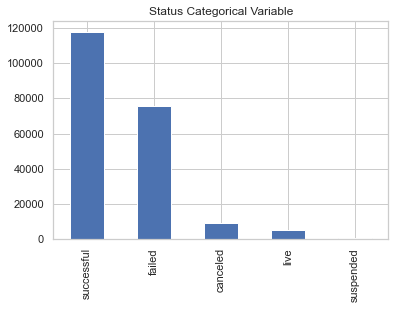

In [ ]:
# Viewing a basic bar plot of the status column

df1['status'].value_counts().plot(kind='bar', title='Status Categorical Variable')

<p>The 5 types of 'status' represent the various states that a project can be in.  It can have reach or surpassed its funding goal and be successful, currently in process of funding and 'live', or it can be one of three failure modes:  'failed, 'canceled', or 'suspended'.  We will drop 'live' campaigns from the dataset in the code below as the success or failure of those is undetermined using this dataset </p>

In [ ]:
# Drop live cmapigns as the success or failure of those is undetermined using this dataset
df1.drop(df1[df1['status'] == 'live'].index, inplace=True)

<AxesSubplot:title={'center':'Percentage Breakdown of Campaign Outcome'}>

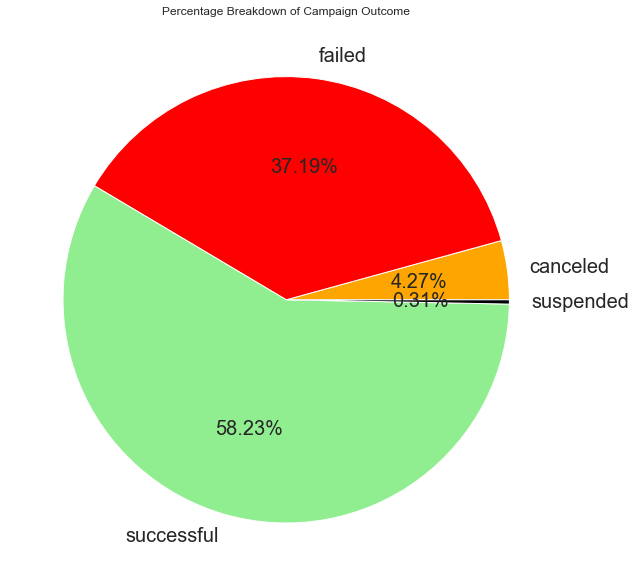

In [ ]:
# Check the percentages of the categorical variables in status.

plt.rcParams['font.size'] = 24
figsize = (10,15)
df1.groupby('status').size().plot(kind='pie', autopct='%.2f%%', textprops={'fontsize': 20},
                                  colors=['orange', 'red', 'lightgreen','black'], legend=False, figsize=figsize, 
                                  title='Percentage Breakdown of Campaign Outcome',
                                 ylabel='')


<p>
We can see that ~58% of the total amount of projects are sucessful over time, due to the business model, it would be
ideal if we could find patterns in the data that could determine wether or not, at a macro level, the campaign has
a higher percentage of success.  These projects could be further promoted on the the platform through targeted email
campaigns or some other means of digital marketing.
</p>


### Barchart of how many Projects per Year in Total were on the platform.

<AxesSubplot:title={'center':'Number of Projects by Year'}, xlabel='start_year'>

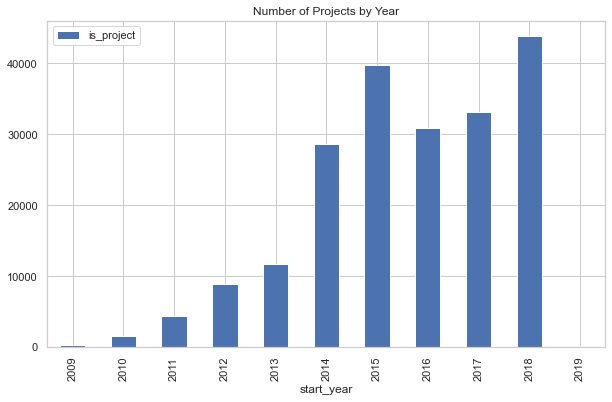

In [ ]:
#plot of how many projects per year there were in total

figsize = (10,6)
df_years = df1.groupby('start_year', as_index=False)['is_project'].sum()
df_years.plot(kind='bar', x='start_year', y='is_project', figsize=figsize, title='Number of Projects by Year')


#### Note: 2019 has very little data, mainly because we dropped all the live data earlier so we will drop 2019 from the analysis.


<AxesSubplot:title={'center':'Number of Projects by Year, 2019 dropped'}, xlabel='start_year'>

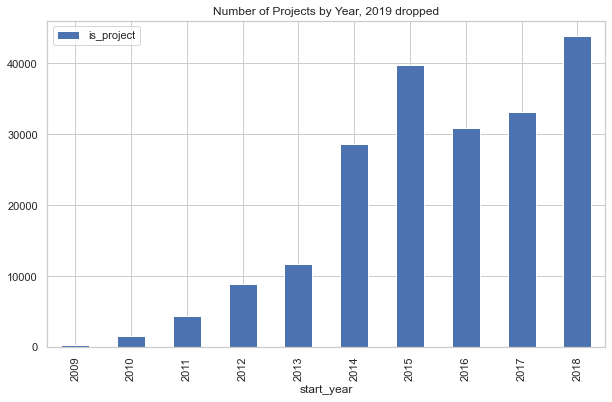

In [ ]:
df1.drop(df1[df1['start_year'] == 2019].index, inplace=True)
figsize = (10,6)
df_years = df1.groupby('start_year', as_index=False)['is_project'].sum()
df_years.plot(kind='bar', x='start_year', y='is_project', figsize=figsize, title='Number of Projects by Year, 2019 dropped')

<p>
It is interesting to note the very noticable decline in total number of projects from 2015 to 2017. 
Let us take a closer look at the percentages of failures to total projects across time.

</p>

<AxesSubplot:title={'center':'Comparison of Successful v Total Projects by Year'}, xlabel='start_year'>

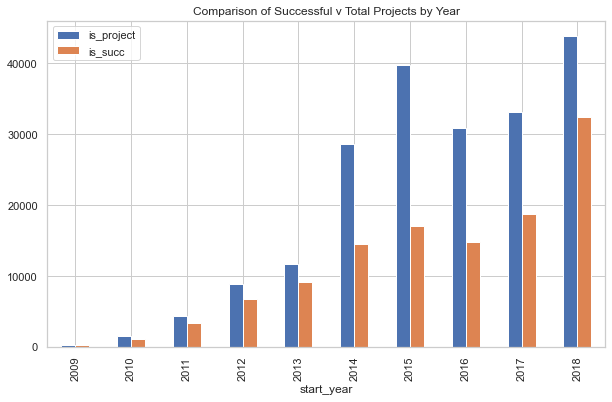

In [ ]:
df_compare = df1[['start_year', 'is_project', 'is_succ' ]]
df_compare = df_compare.groupby('start_year', as_index=False)['is_project','is_succ'].sum()
df_compare.plot(kind='bar', x='start_year', figsize=(10,6), title='Comparison of Successful v Total Projects by Year')
# ax = df_compare.plot.bar(x='start_year',stacked=True, figsize=(10,6))


In [ ]:
df_compare['pct_win'] = round(df_compare['is_succ'] / df_compare['is_project'],2)
df_compare

,start_year,is_project,is_succ,pct_win
0,2009,234,183,0.78
1,2010,1449,1075,0.74
2,2011,4351,3320,0.76
3,2012,8862,6795,0.77
4,2013,11657,9132,0.78
5,2014,28565,14568,0.51
6,2015,39799,17115,0.43
7,2016,30929,14856,0.48
8,2017,33200,18691,0.56
9,2018,43853,32410,0.74


<p>
One can see in the chart and the table above that the success rates in the years from 2014 to 2017 dropped signifigantly
as well as the overall total number of projects hosted on the site.  There could be a potential mulitude of reasons for this 
from competition in the space to nefarious or non-serious creators using the site a s a quick way to make capital.
</p>

### Looking at Kickstarter Gross Revenue
#### According to Kickstarter website the company takes a 5% cut of all campaigns who reach or surpass the targeted goal amount

In [ ]:
# split the data set into winners and losers for further analysis

ks_win = df1[df1['status'] == 'successful']
ks_lose = df1[df1['status'] != 'successful']

#print(len(ks_win) / len(df1))  #quick check to make sure we captured correct data

In [ ]:
# Revenue by Year

print('Total Dollars Pledged to Winning Campaigns: ',round(ks_win['usd_pledged'].sum(),0))
print('Kickstarter Total Income assuming 5% fee of Winning Campaigns: ', round(.05 * ks_win['usd_pledged'].sum(),0))

Total Dollars Pledged to Winning Campaigns:  2611258107.0
Kickstarter Total Income assuming 5% fee of Winning Campaigns:  130562905.0


In [ ]:
ks_win_dollars = ks_win.groupby('start_year', as_index=False)['usd_pledged'].sum()
ks_win_dollars['usd_pledged'] = round(ks_win_dollars['usd_pledged'])
ks_win_dollars['ks_fee_5%_in_millions'] = round((ks_win_dollars['usd_pledged'] * .05) / 1000000,2)
ks_win_dollars

,start_year,usd_pledged,ks_fee_5%_in_millions
0,2009,"788,848.0",0.04
1,2010,"6,336,757.0",0.32
2,2011,"23,010,376.0",1.15
3,2012,"83,009,548.0",4.15
4,2013,"192,176,214.0",9.61
5,2014,"243,111,759.0",12.16
6,2015,"335,226,984.0",16.76
7,2016,"294,979,661.0",14.75
8,2017,"474,845,647.0",23.74
9,2018,"957,772,313.0",47.89


<AxesSubplot:title={'center':'Kickstarter Revenue in Millions'}, xlabel='start_year'>

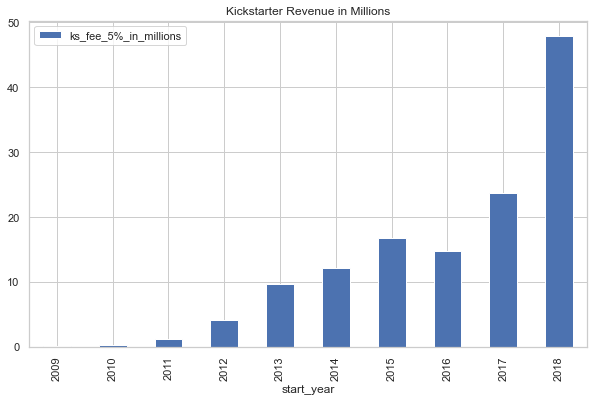

In [ ]:
figsize = (10,6)
ks_win_dollars.plot(kind='bar', x='start_year', y='ks_fee_5%_in_millions', 
                    figsize=figsize, title = 'Kickstarter Revenue in Millions')

<p>
One observed earlier that total amount of projects declined before rising again in 2018 but Kickstarter managed to raise 
much more revenue in 2018 than previously.  Clearly there were many more successful / profitable projects as time went on.
</p>

<p>
Clearly, there are more complex dynamics at play than just the raw number of projects available on the platform.  To further investigate the mystery of the increased success rate rebound it would perhaps benefit one to look into the actual goal amounts to be raised.
</p>

___

## Boxplot to investigate the mean of project funding goals.

In [ ]:
goals_info = round(df1['goal_usd'].describe())
goals_info

count       202,899.0
mean         40,649.0
std       1,108,574.0
min               0.0
25%           1,500.0
50%           5,000.0
75%          12,857.0
max     128,567,921.0
Name: goal_usd, dtype: float64

<p>
One can see the mean of approximately \$40,000, but a standard deviation of \$1.1 million, this implies a highly skewed distribution of 
potential goal amounts. One can also observe that the goal data spans an enormous range of values from \$.70 to \$128 million.  It may be necessary to log-transform the data or select a methodology to remove outliers.
    
Initially, a log-transfrom will be done to maintain the integrity of the data and remove any bias in what constitutes an outlier.
</p>

In [ ]:
# To scale the data better for plotting log transformation is completed

df1['goal_log'] = np.log(df1['goal_usd'] + 1)

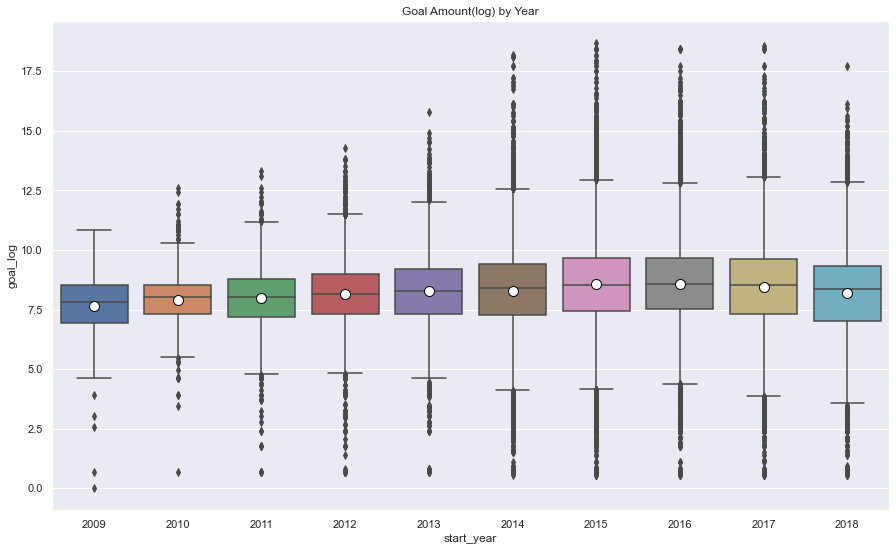

In [ ]:
# Boxplot of Goal Amount by Year

sns.set(rc={'figure.figsize':(15,9)})

ax = sns.boxplot(x='start_year', y='goal_log', data=df1,
                showmeans=True,             
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
                ).set_title('Goal Amount(log) by Year')

<AxesSubplot:title={'center':'Mean Goal Amount by Year'}, xlabel='start_year'>

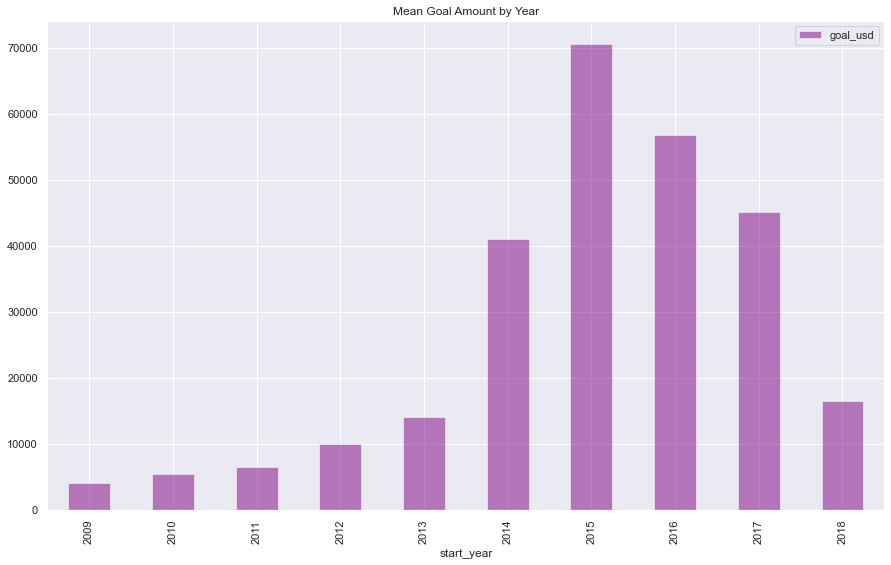

In [ ]:
df_goal_means = df1.groupby('start_year', as_index=False)['goal_usd'].mean()
df_goal_means['goal_usd'] = round(df_goal_means['goal_usd'])
df_goal_means.plot(kind='bar',x='start_year', y='goal_usd', color='purple', alpha=.5, title='Mean Goal Amount by Year')

In [ ]:
#List of goal amounts by year

df_goal_means

,start_year,goal_usd
0,2009,"4,075.0"
1,2010,"5,403.0"
2,2011,"6,466.0"
3,2012,"10,033.0"
4,2013,"14,035.0"
5,2014,"41,058.0"
6,2015,"70,579.0"
7,2016,"56,809.0"
8,2017,"45,126.0"
9,2018,"16,447.0"


<p>
As one can see, a difference in mean goal amounts is signifigantly lower in 2018, than in the most recent preceding years. This is potentially leading to increased success percentage of campaigns and hence more gross revenue for Kickstarter.  

Also visible is the enormous range of potential outlier values skewing the dataset.  More work would need to be performed on analyzing the very high or low goals.
    
Furthering this intial study let us analyze the distributions of successful campaign goals versus unsuccessful ones.
</p>

Text(0.5, 1.0, 'Histogram, Log Scaled, distributions of Successful(blue) v Unsuccessful(red) campaigns Goal amount')

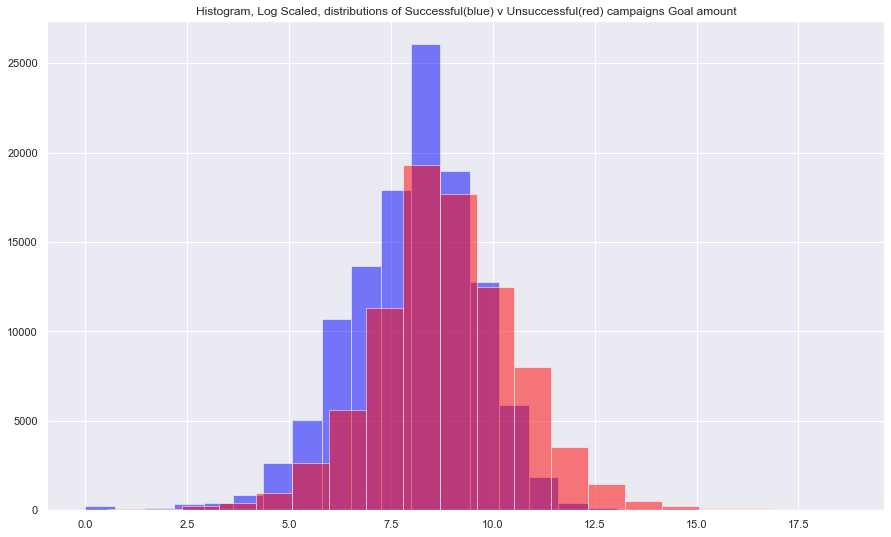

In [ ]:
# Plot the distributions of the winners and loser goal amounts

x1 = np.log(ks_win['goal_usd'] + 1)
x2 = np.log(ks_lose['goal_usd'] + 1)

x1_hist = x1.hist(bins = 20, color='blue',alpha=.5)
x2_hist = x2.hist(bins = 20, color='red', alpha=.5)
x1_hist.set_title('Histogram, Log Scaled, distributions of Successful(blue) v Unsuccessful(red) campaigns Goal amount')


### It is visible in these overlapping distributions that the unsuccessful campaigns are right skewed.  Hence, unsuccessful campaigns seem to be initially asking for too much money for the potential value that the market sees from the end product.

___

## Goal amounts by category type: 

<AxesSubplot:title={'center':'Goal Amounts in $1,000s'}, xlabel='start_year'>

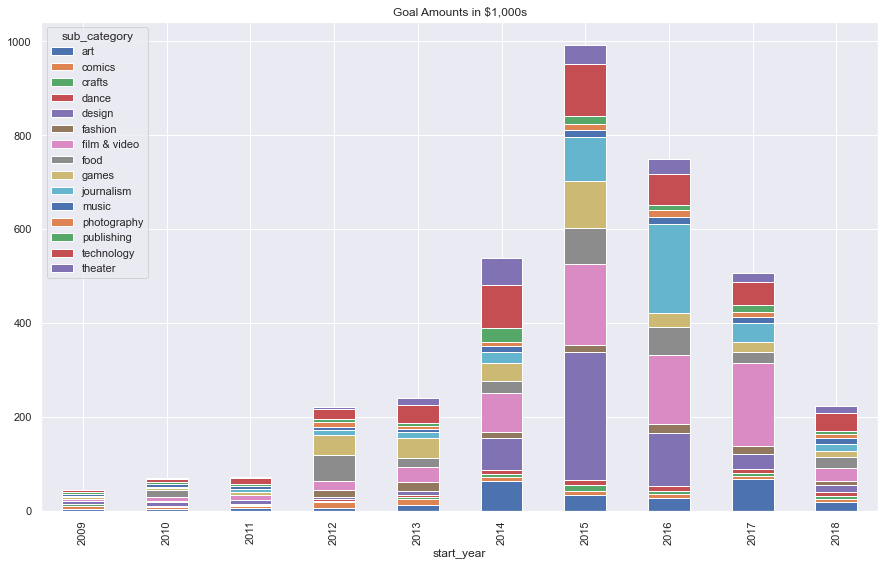

In [ ]:
df_cat_goal_means = df1.groupby(['start_year','sub_category'], as_index=False)['goal_usd'].mean()
df_cat_goal_means['goal_usd'] = df_cat_goal_means['goal_usd'] / 1000

    
sub_df = df_cat_goal_means.groupby(['start_year','sub_category'])['goal_usd'].sum().unstack()
sub_df.plot(kind='bar',stacked=True, legend=True, title='Goal Amounts in $1,000s')
# sub_df.legend(loc='best')

<p>This graph, while interesting is a little complicated to read.  There are some patterns visible in the data however in terms of one being able to observe different categories growing and shrinking over time in the dataset.

It is worth conitnuing to drill down into the dataset to analyze the goal amount by catergory to see if any interesting patterns emerge
</p>

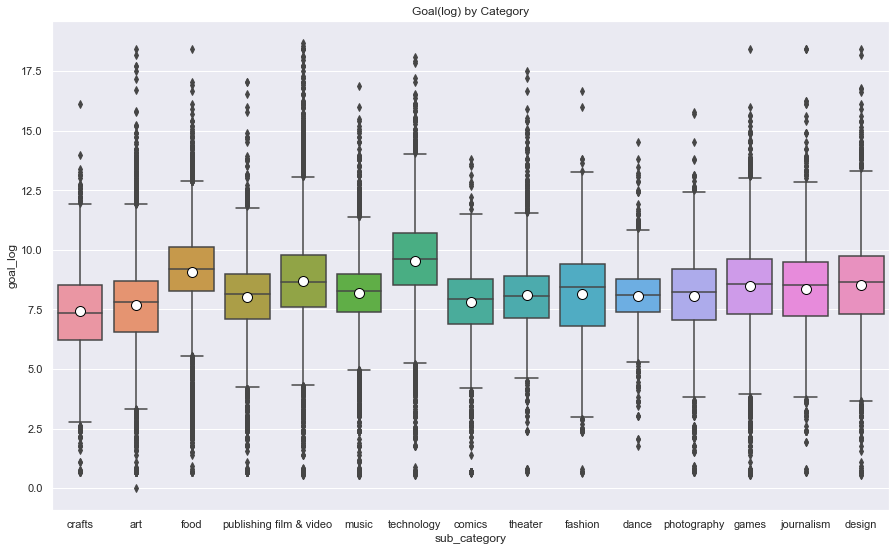

In [ ]:
# log boxplot by category

ax = sns.boxplot(x='sub_category', y='goal_log', data=df1, showmeans=True,             
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Goal(log) by Category")



<p>
Using the theory that lower goal thresholds equal more chances for success we will see if 'crafts' has a better success rate
than 'tech' or 'food'
</p>

In [ ]:
# custom function to calculate the win percentage of a category

def cat_win_pct(df,cat):
    df_x = df[df['sub_category'] == cat]
    inital_shape = df_x.shape[0]
    df_x = df_x.groupby('status', as_index=False).count().copy()
    wc1 = (df_x[df_x["status"] == "successful"]["id"].values[0])
    craft_win_pct = wc1 / inital_shape
    
    return round(craft_win_pct,3)
    

In [ ]:
# For loop to calc win pct for each category

cat_list = df1['sub_category'].unique()
cat_output = []


for cat in cat_list:
    n = cat_win_pct(df1,cat)
    cat_output.append(cat)
    cat_output.append(n)


In [ ]:
# cuctome function to convert lists to dictionaries

def Convert_to_dict(a):
    it = iter(a)
    res_dct = dict(zip(it, it))
    return res_dct

In [ ]:
cat_dict = Convert_to_dict(cat_output)


In [ ]:
# Build dataframe comparing goal means and win_pct for succesful projects

dataset_mean = round(df1['goal_usd'].mean(),1)

df_cat_glm = df1.groupby('sub_category', as_index=False)['goal_usd'].mean().copy()
df_cat_glm['goal_usd'] = round(df_cat_glm['goal_usd'],0)
df_cat_glm['dataset_goal_usd'] = round(dataset_mean,0)
df_cat_glm['diff_usd'] = round(df_cat_glm['goal_usd'] - df_cat_glm['dataset_goal_usd'],0)
df_cat_glm['win_pct'] = df_cat_glm['sub_category']
df_cat_glm['win_pct'] = df_cat_glm.replace({'win_pct': cat_dict})

df_cat_glm.replace({'win_pct': cat_dict}, inplace=True)
# df_cat_glm.sort_values(by=['diff_usd'],inplace=True)

print('\nMean goals and differences vs entire dataset mean goal amount')
df_cat_glm


Mean goals and differences vs entire dataset mean goal amount


,sub_category,goal_usd,dataset_goal_usd,diff_usd,win_pct
0,art,"31,150.0","40,649.0","-9,499.0",0.573
1,comics,"6,532.0","40,649.0","-34,117.0",0.806
2,crafts,"8,412.0","40,649.0","-32,237.0",0.488
3,dance,"7,542.0","40,649.0","-33,107.0",0.822
4,design,"57,763.0","40,649.0","17,114.0",0.682
5,fashion,"13,908.0","40,649.0","-26,741.0",0.599
6,film & video,"108,632.0","40,649.0","67,983.0",0.584
7,food,"45,992.0","40,649.0","5,343.0",0.353
8,games,"32,942.0","40,649.0","-7,707.0",0.657
9,journalism,"82,463.0","40,649.0","41,814.0",0.312


<p>
One can see that the farther the goal amount is under the mean goal amount for the entire dataset, as denoted 
in the 'diff_usd' column, in general the more successful the category tends to be in terms of overall success rate (win_pct).  There potentially are massive outliers skewing the absolute numbers but the pattern seems to hold.
</p>


## Conclusion
___

<p>Based on the above analysis it seems clear that a potential path for Kickstarter to pursue is to start incrementally increasing projects who's goal funding amount is less than the mean current goal amount on the platform.  These projects seem to have a higher level of success than ones who attempt to have outsized targets</p>


### Future Work

<p>In the future clearly other variables should be analyzed in detail such as project duration, number of backers, and potentially using natural language processing (NLP) to analyze project descriptions to see if any of these vairables have further predictive power.

In addition, machine learning models, such as Random Forest or LightGBM could be used to determine if project success is predictable better than baseline.  If so using these particular models it would be possible to extract feature importances to determine which particular variables are predictive of success.  Knowledge that Kickstarter could then use to promote projects that meet the criteria very aggressively or potentially modify the variables of other projects to increase their chances of success.</p>